<a href="https://colab.research.google.com/github/pallavibekal/IISC---Statistics-and-Probability/blob/main/2200092_M1_AST_06_Frequentist_Inference_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 6: Frequentist Inference

## Learning Objectives

At the end of the experiment, you will be able to

* understand the different view points of the frequentist and Bayesian approaches
* understand the basic idea behind statistical hypothesis testing
* Interpret the P-values and R-squared in linear regression analysis

## Information

**Frequentist inference** is a collection of error probabilistic methods which allows us to learn from data about the true state of nature in the presence of uncertainty by using model-based inference. It's core goal involves providing error control in the face of uncertainty. It was developed in the early 20-th century by Fisher, Neyman & Pearson, and others, largely replacing the present approaches to statistical inference, among them Bayesian inference.


Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. In this assignment notebook, we use frequentist statistical inference on a data sample to answer the questions.

* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without? 

Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups.

We introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. We're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

### Dataset

#### Dataset Descrition

Dataset chosen for this assignment is [medical charges sample insurances](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset).  The dataset is made up of 1338 records and 8 columns. It includes important attributes of the Medical Charges. Each record contains the values for

- age: age of policyholder
- sex: gender of policy holder (female=0, male=1)
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight $(kg / m^2)$ using the ratio of height to weight, ideally 18.5 to 25
- steps: average walking steps per day of policyholder
- children: number of children / dependents of policyholder
- smoker: smoking state of policyholder (non-smoke=0;smoker=1)
- region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
- charges: individual medical costs billed by health insurance
- insuranceclaim: yes=1, no=0

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2200092" #@param {type:"string"}

In [4]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9686800288" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M1_AST_06_Frequentist_Inference_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/insurance2.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing required packages

In [5]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm                             # A normal continuous random variable
from numpy.random import seed                            # set the randomness
from scipy import stats                                  # statistical operations
import warnings
warnings.simplefilter("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Load the data

In [6]:
# Read the dataset
medical = pd.read_csv('insurance2.csv')
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


### Hypothesis Testing

Hypothesis testing or significance testing is a statistical method for testing a claim or hypothesis  about a parameter in a population, using data measured in a sample. It is basically an assumption that we make about the population parameter.
There are basically two types, namely
* null hypothesis
* alternative hypothesis

The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data. If there is little evidence against the null hypothesis given the data, you do not reject the null hypothesis. If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis: that something interesting is going on. The exact form of the alternative hypothesis will depend on the specific test you are carrying out.

Once you have the null and alternative hypothesis in hand, you choose a significance level (α). The significance level is a probability threshold that determines when you reject the null hypothesis. After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. This probability of seeing a result as extreme or more extreme than the one observed is known as the p-value.

A z-test is a statistical test used to determine whether two population means are different when the variances are known and the sample size is large. A z-statistic, or z-score, is a number representing the result from the z-test. Z-tests assume the standard deviation is known, while t-tests assume it is unknown.

**One-Sample Z-Test**

We perform the One-Sample Z test when we want to compare a sample mean with the population mean. Let's create some dummy age data for the population of voters in the entire country and a sample of voters in North_Carolina and test the whether the average age of voters North_Carolina differs from the population

In [7]:
np.random.seed(6)

# Population ages
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)                  # .rvs provides random samples, To shift distribution use the loc parameter
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

# sample ages
North_Carolina_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
North_Carolina_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
North_Carolina_ages = np.concatenate((North_Carolina_ages1, North_Carolina_ages2))

print( population_ages.mean() )
print( North_Carolina_ages.mean() )

43.000112
39.26


To know more about `stats.poisson.rvs` click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

Notice that we used a slightly different combination of distributions to generate the sample data for North_Carolina, so we know that the two means are different. Let's conduct a z-test at a 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the population. To conduct a one sample z-test, we can use the `stats.ztest()` function by passing `alternative` argument as `smaller`.

In [8]:
sm.stats.ztest(x1= North_Carolina_ages, x2=None, value=43, alternative='smaller')     

(-2.5741944001909505, 0.005023690119170063)

The test result shows the test statistic "z" is equal to -2.574. The z score tells us how many standard deviations from the mean our score is. In this example, our score is -2.57 standard deviations below the mean. Also,  we can reject the null hypothesis that the mean of samples is equal the value or population mean (43).

**Two-Sample Z-Test**

The Two-Sample Z-test is used to compare the means of two samples to see if it is feasible that they come from the same population. The null hypothesis is: the population means are equal. The Z-test is preferred to the t-test for large samples (N > 30)  or when the variance is known, otherwise, the sample standard deviation is a more biased estimate of a population standard deviance than is allowable, and using a two-sample t-test should be considered.

In [9]:
np.random.seed(12)
South_Carolina_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
South_Carolina_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
South_Carolina_ages = np.concatenate((South_Carolina_ages1, South_Carolina_ages2))

print( South_Carolina_ages.mean() )

42.8


In [10]:
sm.stats.ztest(x1= North_Carolina_ages,
                x2= South_Carolina_ages,
                alternative='two-sided')    # Assume samples have equal variance

(-1.7083870793286842, 0.08756454310443189)

The test yields a p-value of 0.0875, which means there is a 8.75% chance we'd see the difference in the means of the two sample data are not equal to value (here, it is 0 as here we calculate the difference of the two sample means), if these two groups tested are actually identical. If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%.

**Paired Z-Test**

The paired z-test may be used to test whether the mean difference of two populations is greater than, less than, or not equal to 0. Because the standard normal distribution is used to calculate critical values for the test, this test is often called the paired z-test. The paired z-test assumes that the population standard deviation of paired differences is known.

In [11]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)
weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})
weight_df.describe()             # Check a summary of the data

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


The summary shows that patients lost about 1.23 pounds on average after treatment. Let's conduct a paired z-test to see whether this difference is significant at a 95% confidence level

In [12]:
sm.stats.ztest(x1 = before,
              x2 = after, alternative='two-sided')

(0.30766488645979395, 0.7583373410322501)

The p-value in the test output shows that the difference in means not equal to the value (0) is over 75%.

## Optional

### Linear Model

Let's consider a simple equation y = 2 * x + 4 

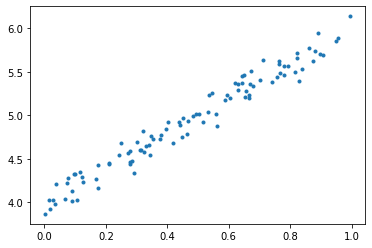

In [13]:
# creating an array
x_train = np.random.rand(100).astype(np.float32)

# noise is added to randomize the data
noise = np.random.normal(scale=0.1, size=len(x_train))
# applying the equation to store the ground truth
y_train = 2*x_train + 4 + noise

# plot the data
plt.plot(x_train, y_train, '.');

#### Linear Regression model using sklearn

Fit the model on the given data and get the predictions

In [14]:
from sklearn.linear_model import LinearRegression

# reshape the data
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

# Apply Linear regression from sklearn
lm = LinearRegression()
lm.fit(x_train, y_train)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(x_train)

#### Calculate the MSE, Standard Error,  and p-value

Now that we have coefficients, to find if they are relevant to predict the target, p-value is used. The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

To know more about how to calculate p-value click [here](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/manually-calculate-a-p-value)

In [15]:
newX = np.append(np.ones((len(x_train),1)), x_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

# Calculating the standard error
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

# calculating p_values
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

# rounding off the variablevalues
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

In [16]:
# Create a empty dataframe
df1 = pd.DataFrame() 
# assign values to each column of a dataframe
df1["Coefficients"] = params
df1["Standard Errors"] = sd_b
df1["t values"] = ts_b
df1["Probabilities"] = p_values
df1

,Coefficients,Standard Errors,t values,Probabilities
0,3.9918,0.021,186.612,0.0
1,2.0026,0.039,50.995,0.0


Now let's verify with OLS method using statsmodel

In [17]:
import statsmodels.api as sm
x_train2 = sm.add_constant(x_train)
# OLS method
model = sm.OLS(y_train,x_train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     2601.
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           2.28e-72
Time:                        12:15:12   Log-Likelihood:                 82.516
No. Observations:                 100   AIC:                            -161.0
Df Residuals:                      98   BIC:                            -155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9918      0.021    186.612      0.000       3.949       4.034
x1             2.0027      0.039     50.995      0.000       1.925       2.081
==============================================================================
Omnibus:                        1.854   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.475
Skew:                          -0.114   Prob(JB):                        0.478
Kurtosis:                       2.450   Cond. No.                         4.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To know more about `statsmodel.api.OLS` click [here](https://www.statsmodels.org/0.8.0/generated/statsmodels.regression.linear_model.OLS.html)

### Please answer the questions below to complete the experiment:




In [20]:
# @title In a hypothesis test, what does the p value signify? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "smallest level of significance for rejection of Null Hypothesis" #@param ["","smallest level of significance for rejection of Null Hypothesis","largest level of significance for rejection of Null Hypothesis","smallest level of significance for acceptance of Null Hypothesis"]

In [18]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [27]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}


In [22]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [23]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [24]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [28]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1300
Date of submission:  17 Jul 2021
Time of submission:  17:50:57
View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions
